In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import os
import PIL
import shutil

# 경로지정

In [2]:
# 기본 경로
base_dir = 'C:/images/OX_images/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 훈련용 O/X 이미지 경로
train_o_dir = os.path.join(train_dir, 'O')
train_x_dir = os.path.join(train_dir, 'X')
print(train_o_dir, train_x_dir)

# 검증용 O/X 이미지 경로
validation_o_dir = os.path.join(validation_dir, 'O')
validation_x_dir = os.path.join(validation_dir, 'X')
print(validation_o_dir, validation_x_dir)

# 테스트용 O/X 이미지 경로
test_o_dir = os.path.join(test_dir, 'O')
test_x_dir = os.path.join(test_dir, 'X')
print(test_o_dir, test_x_dir)

C:/images/OX_images/train\O C:/images/OX_images/train\X
C:/images/OX_images/validation\O C:/images/OX_images/validation\X
C:/images/OX_images/test\O C:/images/OX_images/test\X


# 이미지 파일 이름 조회

In [3]:
# 훈련용 이미지 파일 이름 조회
train_o_fnames = os.listdir(train_o_dir)
train_x_fnames = os.listdir(train_x_dir)
print(train_o_fnames)
print(train_x_fnames)

print('Total training o images :', len(os.listdir(train_o_dir)))
print('Total training x images :', len(os.listdir(train_x_dir)))

print('Total validation o image :', len(os.listdir(validation_o_dir)))
print('Total validation x image :', len(os.listdir(validation_x_dir)))

print('Total test o images :', len(os.listdir(test_o_dir)))
print('Total test x images :', len(os.listdir(test_x_dir)))

['O_1.png', 'O_10.png', 'O_11.png', 'O_12.png', 'O_13.png', 'O_14.png', 'O_15.png', 'O_16.png', 'O_17.png', 'O_18.png', 'O_19.png', 'O_2.png', 'O_20.png', 'O_21.png', 'O_22.png', 'O_23.png', 'O_24.png', 'O_25.png', 'O_26.png', 'O_27.png', 'O_28.png', 'O_29.png', 'O_3.png', 'O_30.png', 'O_4.png', 'O_5.png', 'O_6.png', 'O_7.png', 'O_8.png', 'O_9.png']
['X_1.png', 'X_10.png', 'X_11.png', 'X_12.png', 'X_13.png', 'X_14.png', 'X_15.png', 'X_16.png', 'X_17.png', 'X_18.png', 'X_19.png', 'X_2.png', 'X_20.png', 'X_21.png', 'X_22.png', 'X_23.png', 'X_24.png', 'X_25.png', 'X_26.png', 'X_27.png', 'X_28.png', 'X_29.png', 'X_3.png', 'X_30.png', 'X_4.png', 'X_5.png', 'X_6.png', 'X_7.png', 'X_8.png', 'X_9.png']
Total training o images : 30
Total training x images : 30
Total validation o image : 10
Total validation x image : 10
Total test o images : 10
Total test x images : 10


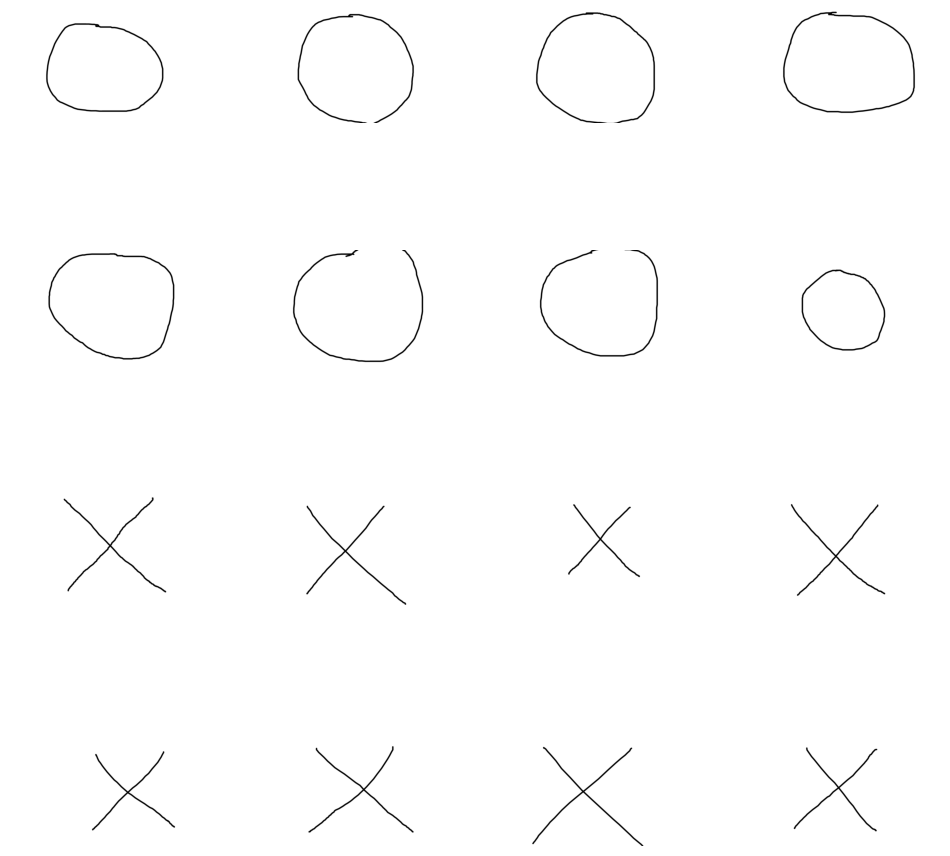

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows, ncols = 4, 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_o_pix = [os.path.join(train_o_dir, fname) for fname in train_o_fnames[pic_index-8:pic_index]]
next_x_pix = [os.path.join(train_x_dir, fname) for fname in train_x_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_o_pix+next_x_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('OFF')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

# 이미지 데이터 전처리
### 이미지 데이터 생성

In [22]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmentation
# train셋에만 적용
train_datagen = ImageDataGenerator(rescale = 1./255,        # 모든 이미지 원소값을 255로 나눔
                                   rotation_range=25,       # 0~25도 사이에서 임의의 각도로 원본이미지를 회전
                                   width_shift_range=0.05,  # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 좌우 이동
                                   height_shift_range=0.05, # 0.05범위 내에서 임의의 값만큼 임의의 방향으로 상하 이동
                                   zoom_range=0.2,          # (1-0.2)~(1+0.2) 사이의 임의의 수치만큼 확대/축소
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

# validation 및 test 이미지는 augmentation을 적용하지 X
# 모델 성능을 평가할 때에는 이미지 원본을 사용 (rescale만 진행)
validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# flow_from_directory() 메서드를 이용해서 훈련과 테스트에 사용될 이미지 데이터를 만들기
# 변환된 이미지 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=16,              # 한번에 이미지 16개씩 변환
                                                    color_mode='grayscale',
                                                    class_mode='binary',
                                                    target_size=(150,150))
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=4,
                                                              color_mode='grayscale',
                                                              class_mode='binary',
                                                              target_size=(150,150))
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=4,
                                                  color_mode='grayscale',
                                                  class_mode='binary',
                                                  target_size=(150,150))


Found 60 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Found 20 images belonging to 2 classes.


In [10]:
# class 확인
train_generator.class_indices

{'O': 0, 'X': 1}

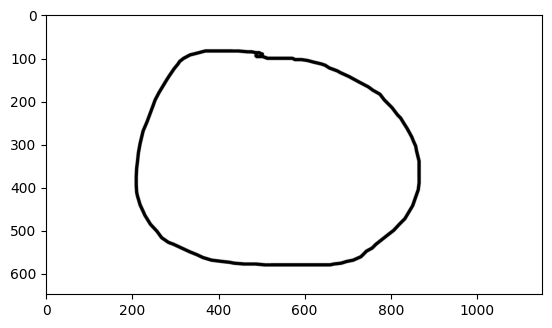

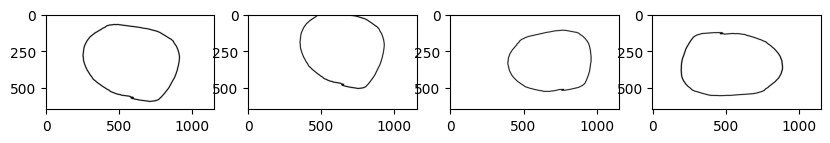

In [11]:
# Augmentation 적용 확인
sample_img = mpimg.imread(next_o_pix[0])
plt.imshow(sample_img)
plt.show()

max_iter = 4
cnt = 1
sample_img2 = sample_img[np.newaxis, ...]

plt.figure(figsize=(10,10))
for img in train_datagen.flow(sample_img2):
    plt.subplot(1, max_iter, cnt)
    plt.imshow(image.array_to_img(img[0]))
    if cnt == max_iter:
        break
    cnt += 1

# 모델 구성

In [12]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150,150,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary() # 신경망 구조 확인

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

# 모델 학습

In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=4,
                              epochs=50,
                              validation_steps=4,
                              verbose=2)

model.evaluate(train_generator)
model.evaluate(validation_generator)

C:\Users\Hong\AppData\Local\Temp\ipykernel_1860\3343762083.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/50
4/4 - 2s - loss: 3.1374 - accuracy: 0.5000 - val_loss: 0.6583 - val_accuracy: 0.6250 - 2s/epoch - 602ms/step
Epoch 2/50
4/4 - 1s - loss: 0.7031 - accuracy: 0.5667 - val_loss: 0.7130 - val_accuracy: 0.4375 - 1s/epoch - 319ms/step
Epoch 3/50
4/4 - 1s - loss: 0.7111 - accuracy: 0.4667 - val_loss: 0.6760 - val_accuracy: 0.9375 - 1s/epoch - 305ms/step
Epoch 4/50
4/4 - 1s - loss: 0.6884 - accuracy: 0.6667 - val_loss: 0.6658 - val_accuracy: 0.5625 - 1s/epoch - 303ms/step
Epoch 5/50
4/4 - 1s - loss: 0.7055 - accuracy: 0.6167 - val_loss: 0.7766 - val_accuracy: 0.5000 - 1s/epoch - 302ms/step
Epoch 6/50
4/4 - 1s - loss: 0.7035 - accuracy: 0.6500 - val_loss: 0.6492 - val_accuracy: 0.4375 - 1s/epoch - 308ms/step
Epoch 7/50
4/4 - 1s - loss: 0.6459 - accuracy: 0.5667 - val_loss: 0.6689 - val_accuracy: 0.5000 - 1s/epoch - 303ms/step
Epoch 8/50
4/4 - 1s - loss: 0.6052 - accuracy: 0.7333 - val_loss: 0.5165 - val_accuracy: 0.5000 - 1s/epoch - 300ms/step
Epoch 9/50
4/4 - 1s - loss: 0.5311 - acc

[0.2171284407377243, 0.949999988079071]

### 학습률 시각화

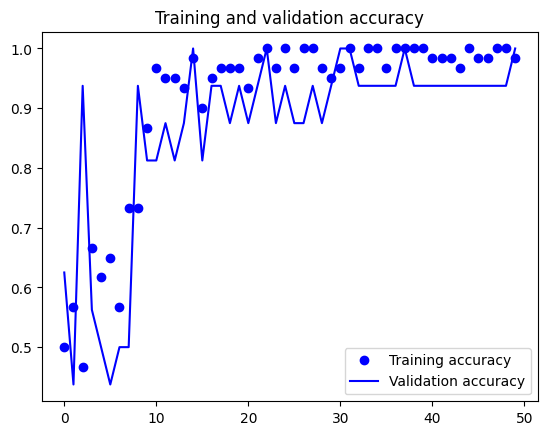

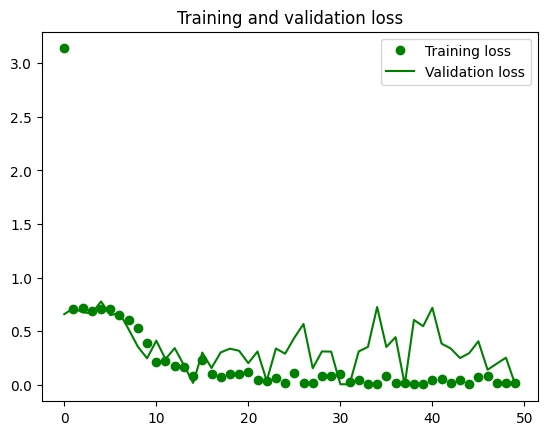

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 테스트 평가

1/1 [==============================] - 0s 28ms/step


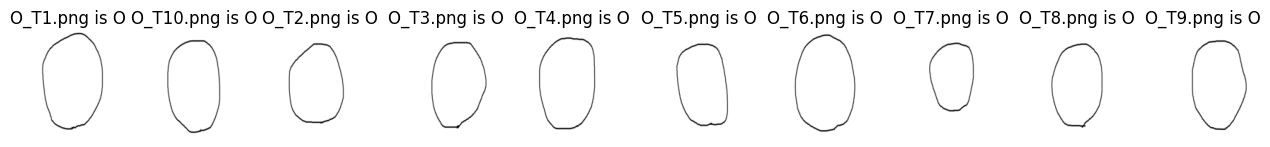

1/1 [==============================] - 0s 31ms/step


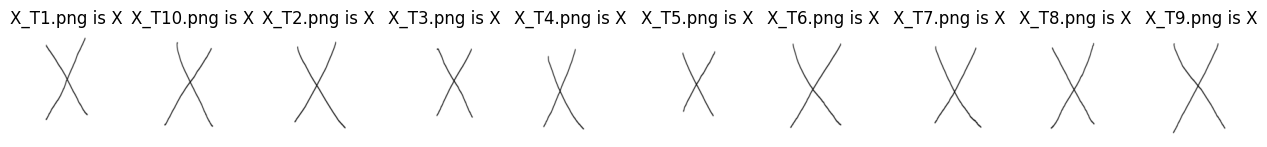

In [29]:
from tensorflow.keras.preprocessing.image import load_img

# 테스트용 O 이미지 경로 설정
test_dir = 'C:/images/OX_images/test/'
test_o_dir = os.path.join(test_dir, 'O/')
test_o_filenames = os.listdir(test_o_dir)
test_o_filenames

# 테스트용 X 이미지 경로 설정
test_dir = 'C:/images/OX_images/test/'
test_x_dir = os.path.join(test_dir, 'X/')
test_x_filenames = os.listdir(test_x_dir)
test_x_filenames

# O,X를 key로, 이미지 파일 이름들을 value로 dictionary 생성
dic_ox_filenames = {}
dic_ox_filenames['O'] = test_o_filenames
dic_ox_filenames['X'] = test_x_filenames

# O/X 분류 테스트
for ox, filenames in dic_ox_filenames.items():
    fig = plt.figure(figsize=(16,10))
    rows, cols = 1, 10
    for i, fn in enumerate(filenames):
        path = test_dir + ox + '/' + fn
        test_img = image.load_img(path, color_mode='grayscale', target_size=(150,150), interpolation='bilinear')
        x = image.img_to_array(test_img)
        x = np.expand_dims(x, axis=0)
        images  = np.vstack([x])
        
        classes = model.predict(images, batch_size=10)
        
        fig.add_subplot(rows, cols, i+1)
        if classes[0] == 0:
            plt.title(fn + " is O")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
        else:
            plt.title(fn + " is X")
            plt.axis('off')
            plt.imshow(test_img, cmap='gray')
    plt.show()

In [30]:
# 모델 성능 평가
model.evaluate(test_generator)

5/5 [==============================] - 0s 42ms/step - loss: 4.8261e-05 - accuracy: 1.0000


[4.8260648327413946e-05, 1.0]

In [31]:
# 모델 저장
model.save('ox_class_cnn.h5')